In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterExponent
from tqdm import tqdm
import emcee
import corner

Create the complicated function as mentioned:

In [258]:
def log_likelihood(params, a=8, b=2, c=3):
    """
    Negative Log-likelihood function defined below, with the dark energy, dark matter parameters
    
    """
    x, y = params  # params is tuple of 2 numbers
    # Define some complicated function as our log-likelihood

    # log_likelihood = -1/(1 + x ** 8) - np.exp(y/4)
    log_likelihood = 1/((1 + np.exp(a*(x - b))) * (1 + np.exp(-a*(x + b)))) + np.exp(y/c)
    
    # return np.max([1.325, log_likelihood])
    return log_likelihood

Test to make sure the Rosenbrock function is actually being plotted as suggested:

In [259]:
contour_max, contour_min

(1.8396746196808442, 0.2814124594381855)

<a list of 32 text.Text objects>

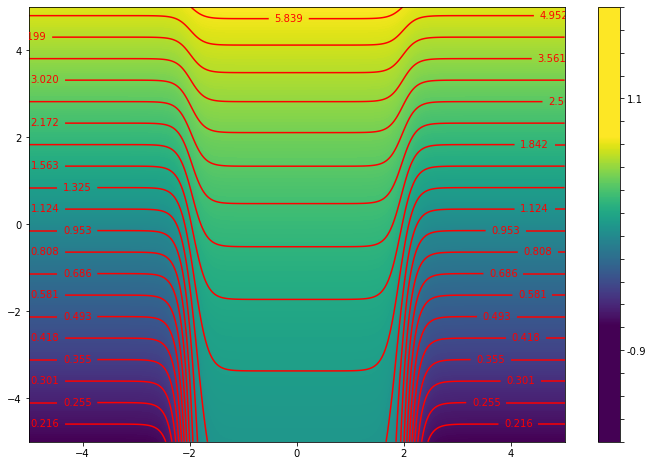

In [264]:
npoints = 500

# bounds of our sampling
x_lower = -5
x_upper = 5
y_lower = -5
y_upper = 5
# min and max for the contours
contour_min = np.log(np.min(testarr))
contour_max = np.log(np.max(testarr))

testarr = np.zeros((npoints, npoints))
X, Y = np.meshgrid(np.linspace(x_lower, x_upper, npoints), np.linspace(y_lower, y_upper, npoints))

for i in range(0, len(X)):
    for j in range(0, len(Y)):
        testarr[i, j] = log_likelihood((X[i, j], Y[i, j]))  # log likelihood
        
# plot

plt.figure(figsize = (12, 8))
plt.contourf(X, Y, testarr, levels=np.logspace(contour_min, contour_max, npoints), 
             norm = LogNorm(vmin = np.min(testarr), vmax = np.max(testarr)))
cb = plt.colorbar()
cb.formatter = LogFormatterExponent(base=10)
# this goes from ~ -50 to 0
cb.set_ticks(np.logspace(contour_min, contour_max, 20), update_ticks=True)

fig = plt.contour(X, Y, testarr, levels=np.logspace(contour_min, contour_max, 50), 
            norm = LogNorm(vmin = np.min(testarr), vmax = np.max(testarr)), colors='r')

plt.clabel(fig, inline=True, fontsize=10)


test

Define a prior that is uniform over $x = \left[-2, 3\right]$, $y = \left[-1, 8\right]$ that is $0$ everywhere else, and a log probability as `log_prior` + `neg_log_likelihood`:

In [6]:
def rosenbrock_log_prior(params, x_min=x_lower, x_max=x_upper, y_min=y_lower, y_max=y_upper):
    """
    Log prior that is uniform over x = (-2, 3), y = (-1, 5) and 0 outside of that range
    """
    # params are x and y
    x, y = params
    # if they fall within [-2, 2], [-1, 3] uniform prior, otherwise 0 outside that range
    if (x_min <= x <= x_max and y_min <= y <= y_max):
        return 0.  # log prior, so ln(1) = 0
    else:
        return -np.inf  # log prior, so ln(0) = -infinity
    
    
def rosenbrock_log_probability(params):
    # get the log prior for the params
    rosenbrock_lp = rosenbrock_log_prior(params)
    # negative infinity (log(0)) if outside [-2, 3], [-1, 5] as detected by log prior
    if not np.isfinite(rosenbrock_lp):
        return -np.inf
    # otherwise, log prob is log prior + log likelihood
    return rosenbrock_lp + rosenbrock_neg_log_likelihood(params)

Now set up the MCMC (use $50$ walkers with $50000$ steps) just to check. The starting position of our walkers is drawn from a small Gaussian distribution ($\sigma = 0.01$) around the global minimum $[-1, 1]$:

In [7]:
nwalkers = 50  # nubmer of walkers to use in the MCMC
ndim = 2  # 2 dimensions for our rosenbrock function
seed = 1234  # seed to use for picking a random point
nsteps = 50000  # number of mcmc steps to take

# choose the global minimum [-1, 1] as our starting position 
# and see if the chains are still well-mixed
np.random.seed(seed)  # set the seed

pos = np.random.multivariate_normal((1, 1), cov = np.diag([0.01, 0.01], k=0), size = nwalkers)  # Gaussian ball, 0.01 chosen arbitrarily
# pos = np.random.uniform([x_lower, y_lower], [x_upper, y_upper], size=(nwalkers, ndim))  # choose n random points uniformly

# setting up the MCMC sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, rosenbrock_log_probability)

And run the sampler:

In [8]:
sampler.run_mcmc(pos, nsteps, progress=True)

100%|██████████| 50000/50000 [00:35<00:00, 1398.82it/s]


State([[ 0.06312278 -0.07894934]
 [ 0.04353407 -0.14752877]
 [ 2.06438135  4.22280281]
 [ 0.61940198  0.34713499]
 [ 2.29711635  5.21092096]
 [ 0.69378085  0.50042115]
 [ 1.15567521  1.30845971]
 [ 0.2756292   0.02996015]
 [ 1.54648403  2.32799105]
 [ 0.89876632  0.77310529]
 [-0.10711792  0.17778006]
 [ 0.48883445  0.18163976]
 [ 1.41664339  1.9775248 ]
 [ 1.36038218  1.86190338]
 [ 1.39620133  1.94247287]
 [ 1.38604921  1.84622944]
 [ 1.71196299  2.95338928]
 [ 0.71348553  0.47621592]
 [ 1.08846731  1.29674833]
 [ 1.14315433  1.36109656]
 [ 0.93516419  0.72204378]
 [ 1.50536025  2.27721687]
 [ 0.23424432  0.07240204]
 [ 2.02043927  4.2201674 ]
 [ 1.94431081  3.75017212]
 [ 1.79931275  3.2814588 ]
 [-0.25236571  0.08384937]
 [ 1.27304935  1.47685914]
 [ 0.98586588  0.94772341]
 [ 0.384989    0.13112553]
 [ 2.09298691  4.44834831]
 [ 0.1052951   0.03590743]
 [-0.12137784  0.11772281]
 [ 1.26931155  1.57231652]
 [ 1.4352392   2.11602431]
 [ 1.1914392   1.45748177]
 [ 1.05624327  1.11660

Get the samples as a chain:

In [9]:
samples = sampler.get_chain()[200:]  # discard the first 200 samples ("burn-in" time for the chains to be well-mixed)
# split into x and y samples
x_samples = samples[:, :, 0]
y_samples = samples[:, :, 1]

2D histogram of the sampled distribution:

(Text(0.5, 0, 'x'), Text(0, 0.5, 'y'))

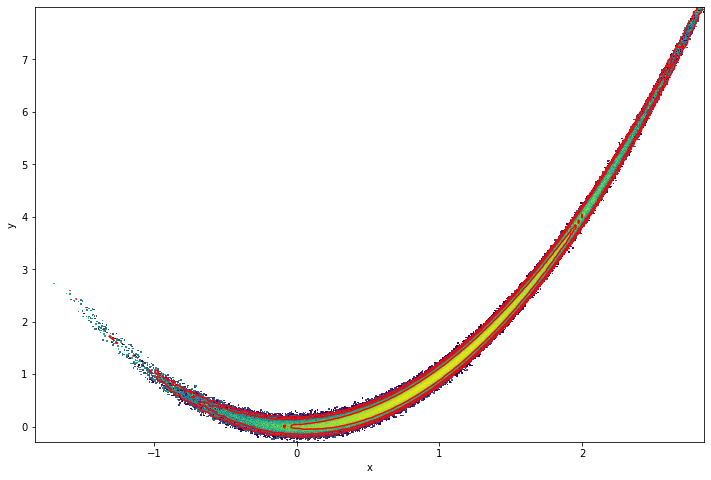

In [10]:
plt.figure(figsize = (12, 8))
corner.hist2d(x_samples.reshape(-1), y_samples.reshape(-1), s=0.1, bins=200, plot_datapoints=False, plot_density=False, levels=[0.68, 0.95, 0.99], color='r')
plt.hist2d(x_samples.reshape(-1), y_samples.reshape(-1), norm = LogNorm(), bins=1000)
plt.xlabel('x'), plt.ylabel('y')

Plot to see if the chains are well-mixed:

Text(0.5, 0, 'step number')

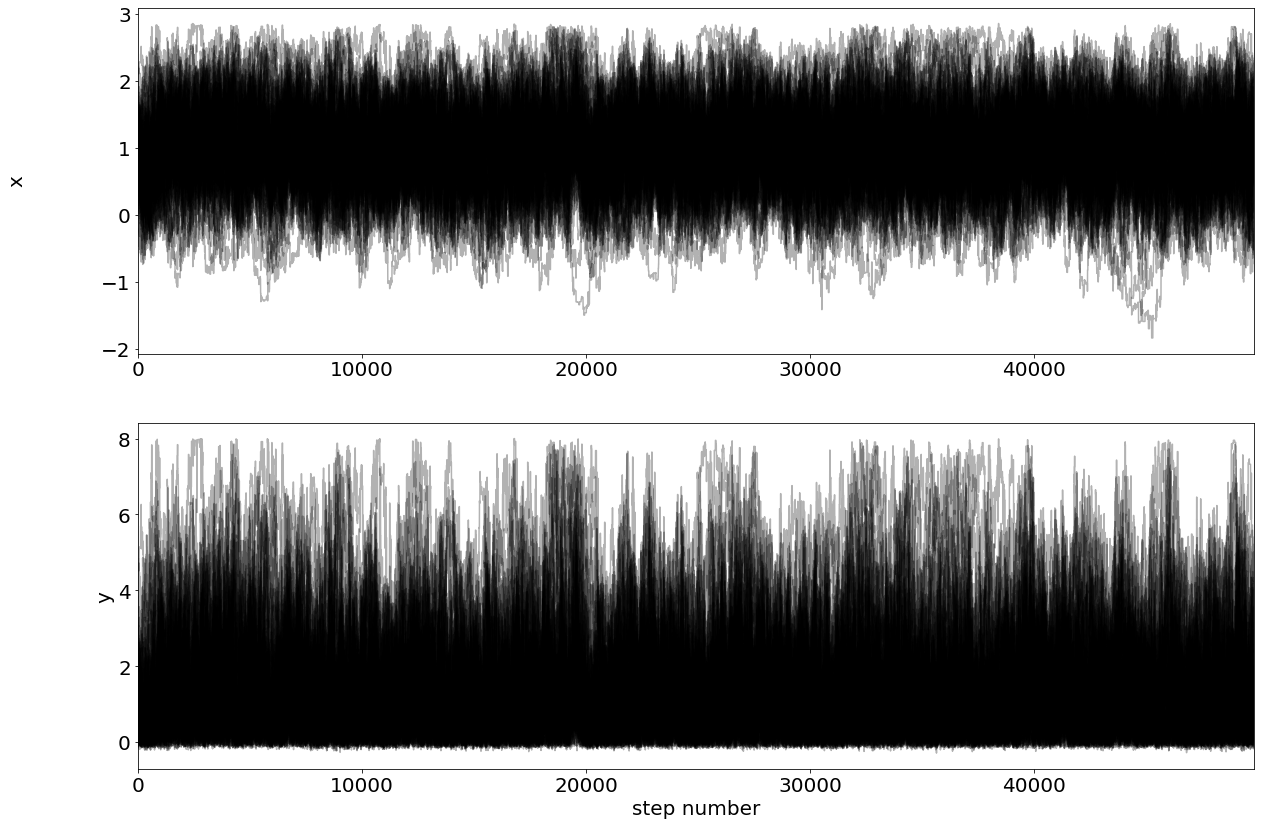

In [11]:
plt.rc('font', size=20)
_, ax = plt.subplots(2, figsize = (20, 14))
# plot the chains for x
ax[0].plot(x_samples, color='k', alpha=0.3)
ax[0].set_xlim(0, len(samples))
ax[0].set_ylabel('x')
ax[0].yaxis.set_label_coords(-0.1, 0.5)
# plot the chains for y
ax[1].plot(y_samples, color='k', alpha=0.3)
ax[1].set_xlim(0, len(samples))
ax[1].set_ylabel('y')
# ax[1].yaxis.set_label_coords(-0.1, 0.5)
# set shared x label
ax[1].set_xlabel('step number')